### Rescaling data with Python using Synthetic dataset

#### Step 1: Generate a Synthetic Dataset


In [1]:
import numpy as np
import pandas as pd
from faker import Faker

# Initialize Faker
fake = Faker()

# Generate synthetic data
num_samples = 100
data = {
    'Name': [fake.name() for _ in range(num_samples)],
    'Age': [fake.random_int(min=18, max=65) for _ in range(num_samples)],
    'Salary': [fake.random_int(min=30000, max=100000) for _ in range(num_samples)],
}

# Create a DataFrame
df = pd.DataFrame(data)

#### Step 2: Visualize the Original Data


Before rescaling, visualize the original data using histograms or scatterplots to understand its distribution.

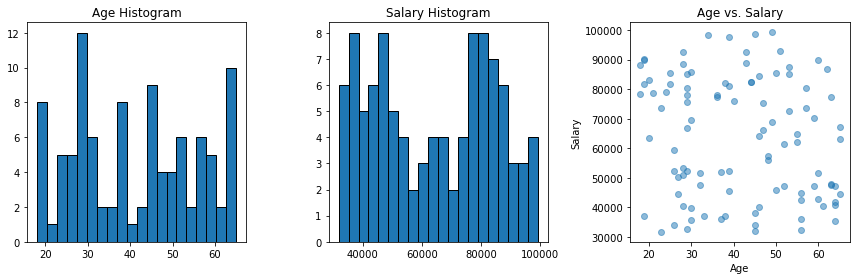

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.title('Age Histogram')

plt.subplot(1, 3, 2)
plt.hist(df['Salary'], bins=20, edgecolor='k')
plt.title('Salary Histogram')

plt.subplot(1, 3, 3)
plt.scatter(df['Age'], df['Salary'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary')

plt.tight_layout()
plt.show()

#### Step 3: Rescale the Data


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Salary']])
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'Salary'])

#### Step 4: Visualize the Scaled Data


Visualize the scaled data to observe how it has changed.

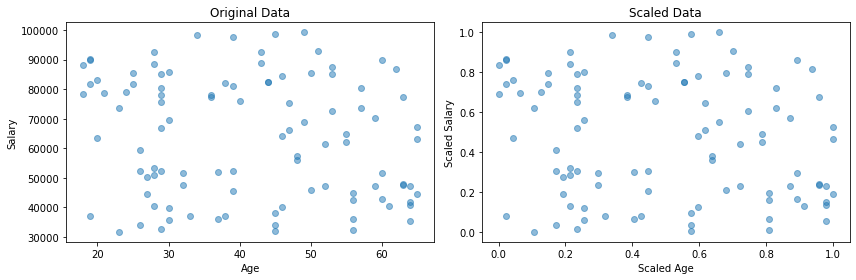

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['Salary'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(df_scaled['Age'], df_scaled['Salary'], alpha=0.5)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Salary')
plt.title('Scaled Data')

plt.tight_layout()
plt.show()

#### Step 5: Analyze the Data


In [5]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Salary  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [11]:
df_scaled.describe()

,Age,Salary
count,100.000000,100.000000
mean,0.497872,0.474873
std,0.306736,0.300614
min,0.000000,0.000000
25%,0.234043,0.202922
50%,0.500000,0.485659
75%,0.755319,0.742896
max,1.000000,1.000000


In [13]:
correlation_matrix = df_scaled.corr()
print(correlation_matrix)

             Age    Salary
Age     1.000000 -0.172441
Salary -0.172441  1.000000


##### Correlation Heatmap
Create a heatmap to visualize the correlation matrix.

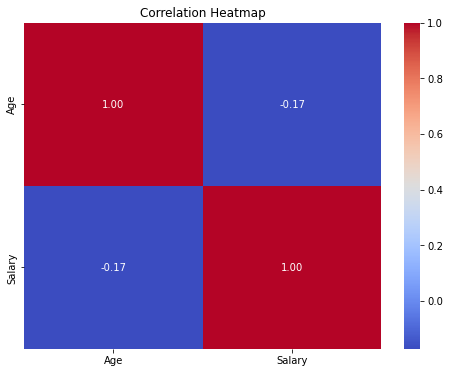

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### Box Plots
Visualize the spread and central tendency of each variable using box plots.

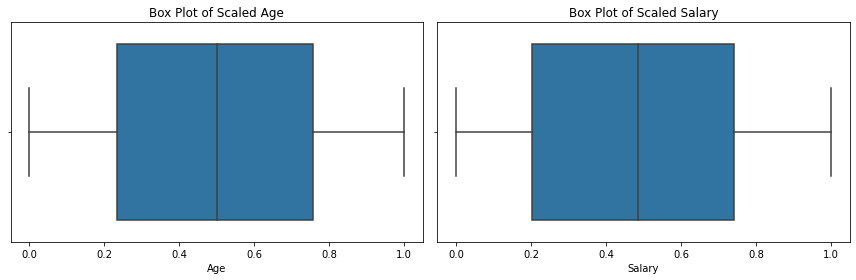

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_scaled['Age'])
plt.title('Box Plot of Scaled Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_scaled['Salary'])
plt.title('Box Plot of Scaled Salary')

plt.tight_layout()
plt.show()


##### Scatterplot Matrix
Create a scatterplot matrix to visualize relationships between variables.

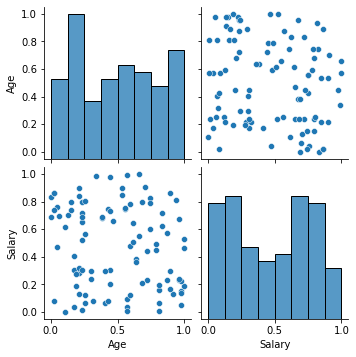

In [17]:
sns.pairplot(df_scaled)
plt.show()

##### Histograms
Visualize the distribution of each variable using histograms.

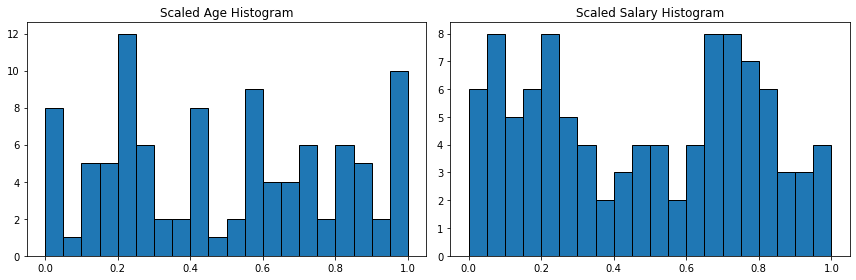

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_scaled['Age'], bins=20, edgecolor='k')
plt.title('Scaled Age Histogram')

plt.subplot(1, 2, 2)
plt.hist(df_scaled['Salary'], bins=20, edgecolor='k')
plt.title('Scaled Salary Histogram')

plt.tight_layout()
plt.show()

These EDA steps provide you with insights into the distribution, relationships, and central tendency of the scaled data. You can further customize your analysis based on your specific research questions and objectives.